# Supernova Remnants Notebook

### Task 1
In this task you will plot the analytical solutions for the Sedov-Taylor phase of the evolution of a supernova remnant. 

First load the modules you will need (numpy and matplotlib).

In [76]:
import matplotlib
import numpy as np
from math import *
import matplotlib.pyplot as plt
from datetime import datetime


To calculate these quantities correctly we need to make sure all values are using the same system of units. Here we are using cgs (centimetres, grams, seconds).
To input and output the values it makes more sense to have them in units more suited to astronomy, to make them easier to read.

Define some constants that can be multiplied by the output values so we can print them out in useful units.

For example, time will be calculated in seconds but it is more useful for us to output it in years, or Megayears. 
So we can define:

$sectoyear = 60 \times 60 \times 24 \times 365.25$

Then multiply this by the output to ensure the time we are reading is printed in years. 

Lengths will be calculated in $cm$ - but we want them in $pc$.

Velocities will be calculated in $cm/s$ - but we want them in $km/s$.

Masses will be calculated in grams - but we want them in solar masses. 

In [77]:
parsec_length = 1 * 3.2408 * (10 ** -19) # parsec length
Velocities = 1 * (10 ** -5) 
solar_masses = 1 * 5.02785 * (10 ** -34) #convert gram to solar masses unit
print(float(solar_masses))

5.02785e-34


Now we need to define some constant values such as the explosion energy and ambient density of the surrounding *ISM (interstellar medium)*. 

Ambient density = 1.E-26   (units = $g /{cm}^3$)

Explosion energy = 1.E51 (units = $erg$)

(These are both in cgs units so they don't need to be converted)

We should also define the mass of the ejected stellar material. For a type II supnernova this would be above 8M$_{\odot}$, for a type Ia supernova it would be much lower as the white dwarf has already blown all of the external stellar material away. We could estimate it to be below 1M$_{\odot}$ in this case. 
Remember the mass will need to be converted into cgs!

In [78]:
Ambient_density = 1. * (10 ** -26)
Explosion_energy = 1. * (10 ** 51)

We are going to be calculating the radius and velocity of the expanding shell during the Sedov-Taylor (ST) phase of the evolution of the SNR. 
To get the initial values for the velocity and radius of the swept up shell for the ST phase, we can estimate the velocity at the end of the free expansion phase.

Work out the initial velocity of the ejected stellar material using the equation below, assuming the explosion energy is converted to kinetic energy. 

### $E_{SN}$ = $\frac{1}{2} M_{e}v_{e}^2$


In [79]:

init_velocity = ((2 * Explosion_energy) / (solar_masses)) ** (1/2)
print(init_velocity)

1.994453161193333e+42


### Task 2

Next we can work out the shell radius (in parsec) at the end of the free expansion phase, then the time it has taken (in years) to reach that radius. Use the equations below and assume the velocity in the free expansion phase is constant.

$\rho_{0}$ is the ambient density of the surrounding interstellar medium.

### $R_{SW} = \left(\frac{3M_{e}}{4\pi\rho_{0}}\right)^{1/3}$

### $t_{SW} = \frac{R_{SW}}{v_{e}}$

In [80]:
Shell_Radius_f = ((3 * solar_masses) / (4 * pi * Ambient_density)) ** (1/3)
time_to_reach_year = Shell_Radius_f/init_velocity

### Task 3

Now work out the radius and velocity of the expanding shell of gas as a function of time during the Sedov-Taylor phase (where the time starts at the end of the free expansion phase). 

### $R_{Sed}(t) = \left(\frac{25E_{SN}}{4\pi\rho_{0}}\right)^{1/5}t^{2/5}$

### $V_{Sed}(t) = \frac{2}{5}\left(\frac{25E_{SN}}{4\pi\rho_{0}}\right)^{1/5}t^{-3/5}$

Remember to use cgs units for the values in your calculations, then convert back to more sensible values (i.e. parsec,  years and km/s) afterwards. 

In [81]:

def Sedov_phase_radius(time):
    Shell_radius = ((25 * Explosion_energy) / (4 * pi * Ambient_density)) ** (1/5) * (time) ** (2/5)
    return Shell_radius
    
def Sedov_phase_velocity(time):
    Shell_velocity = (2/5) * ((25 * Explosion_energy) / (4 * pi * Ambient_density)) ** (1/5) * (time) ** (-3/5)
    return Shell_velocity


Use the subplot function within matplotlib to create two plots showing the evolution of the shell radius with time and the shell velocity with time. 

Remember to add titles and axis labels. 

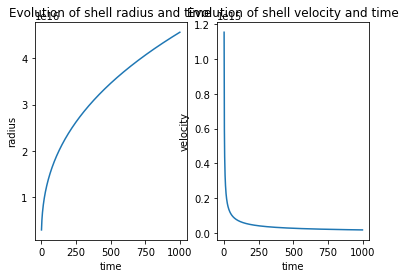

In [82]:
fig, a = plt.subplots(1,2, squeeze=False)
x = np.arange(1,1000)
a[0][0].set_title('Evolution of shell radius and time')
a[0][0].plot(x, Sedov_phase_radius(x))
a[0][1].plot(x, Sedov_phase_velocity(x))
a[0][1].set_title('Evolution of shell velocity and time')

plt.setp(a[-1, :], xlabel='time')
plt.setp(a[0, 0], ylabel='radius')
plt.setp(a[0, 1], ylabel='velocity')

plt.show()


### Task 4

Now we can apply our estmations for the radius and velocity of a SNR to an observed SNR.

The SNR Tycho has an age of 442 years and an ISM density, $\rho_{0} = 3.34\times10^{-25}$gcm$^{-3}$

Using this information and the equations above, estimate the radius and velocity of the Tycho SNR (you can use the same supernova energy as earlier).



In [83]:
#SNR Tycho
sectoyear=60*60*24*365.25
age_snr = 442 * sectoyear
Ism_density = 3.34 * (10 ** -25)

Tycho_SNR_radius = ((25 * Explosion_energy) / (4 * pi * Ism_density)) ** (1/5) * (age_snr) ** (2/5)
Tycho_SNR_velocity = (2/5) * ((25 * Explosion_energy) / (4 * pi *Ism_density)) ** (1/5) * (age_snr) ** (-3/5)

print(Tycho_SNR_radius * parsec_length)
print(Tycho_SNR_velocity * Velocities)

5.2900461440306
4681.025263643828


The real radius of the Tycho SNR is 3.7pc and the shock velocity is around 4500km/s. 
So we can get close values with our very simple models!

### Task 5

What elements are made in a core-collapse supernovae (CCSNe)? They are the main source of oxygen in nature! In this task you will read in the mass coordinates of the ejecta and the abundances from a real CCSN model (by Ritter et al. 2018, MNRAS - https://ui.adsabs.harvard.edu/abs/2018MNRAS.480..538R/abstract) for a progenitor of 15M$_{\odot}$ and solar metallicity. Plot the abundances with respect to mass coordinate and calculate the ejected elements in solar masses.

First, read in the date from the file 'm15z0p02_abundances_mass.txt'

Now set up the data ready for plotting. You will need to create an array with the mass coordinates and an array for each isotope provided. 

In [84]:
filename = 'm15z0p02_abundances_mass.txt'

with open(filename) as f:
    data = f.read()
    lines = data.split("\n") #split each line to list
    
    Mass_msun = []
    
    H_isotope = []
    He_isotope = []
    C_isotope = []
    N_isotope = []
    O_isotope = []
    Si_isotope = []
    Ni_isotope = []
    
    
    for line in lines: #loop through the list of lines
        try:
            new_data = line.split() #split space in each line to list
            new_lis = new_data[0] #get the index 0 of eachline
            Mass_msun.append(new_lis) #append to Mass_msun
            new_lis = new_data[1]
            H_isotope.append(new_lis)
            new_lis = new_data[2]           
            He_isotope.append(new_lis)
            new_lis = new_data[3]
            C_isotope.append(new_lis)
            new_lis = new_data[4]
            N_isotope.append(new_lis)
            new_lis = new_data[5]
            O_isotope.append(new_lis)
            new_lis = new_data[6]
            Si_isotope.append(new_lis)
            new_lis = new_data[7]
            Ni_isotope.append(new_lis)
            
            
            
            
        except:
            print("")
    try:
        Mass_msun.pop(0)
        H_isotope.pop(0)
        He_isotope.pop(0)
        C_isotope.pop(0)
        N_isotope.pop(0)
        O_isotope.pop(0)
        Si_isotope.pop(0)
        Ni_isotope.pop(0)
    except:
        print()
    
    print(Mass_msun)

    
        




['1.610542E+00', '1.610847E+00', '1.611305E+00', '1.611764E+00', '1.612069E+00', '1.612527E+00', '1.612985E+00', '1.613291E+00', '1.613596E+00', '1.613902E+00', '1.614360E+00', '1.614971E+00', '1.615482E+00', '1.615895E+00', '1.616307E+00', '1.616719E+00', '1.617132E+00', '1.617544E+00', '1.617956E+00', '1.618369E+00', '1.618914E+00', '1.619422E+00', '1.619760E+00', '1.620099E+00', '1.620438E+00', '1.620946E+00', '1.621454E+00', '1.621792E+00', '1.622300E+00', '1.622808E+00', '1.623147E+00', '1.623655E+00', '1.624197E+00', '1.624604E+00', '1.625215E+00', '1.625826E+00', '1.626233E+00', '1.626640E+00', '1.627047E+00', '1.627457E+00', '1.627870E+00', '1.628489E+00', '1.629108E+00', '1.629521E+00', '1.629933E+00', '1.630346E+00', '1.630965E+00', '1.631584E+00', '1.631996E+00', '1.632409E+00', '1.632822E+00', '1.633441E+00', '1.634053E+00', '1.634452E+00', '1.635051E+00', '1.635650E+00', '1.636050E+00', '1.636449E+00', '1.636848E+00', '1.637319E+00', '1.637862E+00', '1.638405E+00', '1.638

Now, check that the arrays that you created are correct. Do they make sense? How would you check? You will notice that the mass coordinates will not start from zero. Where do the mass coordinates start? What is happening to the deeper material?



In [85]:
print(str(Mass_msun[2157]))


1.215341E+01


Make a plot of the abundance, X (mass fraction) versus mass coordinates (in solar masses)

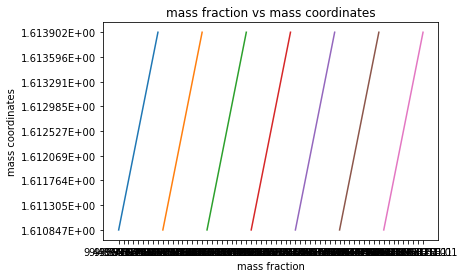

In [86]:

fig, a = plt.subplots(1,1, squeeze=False)
x = np.arange(1,10)



H_mass = np.array(H_isotope)
He_mass = np.array(He_isotope)
C_mass = np.array(C_isotope)
N_mass = np.array(N_isotope)
O_mass = np.array(O_isotope)
Si_mass = np.array(Si_isotope)
Ni_mass = np.array(Ni_isotope)




a[0][0].set_title('mass fraction vs mass coordinates')
a[0][0].plot(H_mass[x], np.array(Mass_msun)[x])
a[0][0].plot(He_mass[x], np.array(Mass_msun)[x])
a[0][0].plot(C_mass[x], np.array(Mass_msun)[x])
a[0][0].plot(N_mass[x], np.array(Mass_msun)[x])
a[0][0].plot(O_mass[x], np.array(Mass_msun)[x])
a[0][0].plot(Si_mass[x], np.array(Mass_msun)[x])
a[0][0].plot(Ni_mass[x], np.array(Mass_msun)[x])



    
    
    
plt.setp(a[-1, :], xlabel='mass fraction')
plt.setp(a[0, 0], ylabel='mass coordinates')


plt.show()


Oh! you got in the plot a onion-shell structure, but it is a bit different.. :)
In the file, you have the abundances for the isotopes H, He4, C12, O16, Si28 and Ni56. 
Now calculate what is the abundance of these isotopes in the SN ejecta, in solar mass units. How would you do it? You have mass coordinates (in solar masses), and abundances in mass fraction. 

In [87]:
# find abundance of isotope
vector = np.vectorize(np.float)
Solar_H_mass = vector(H_mass) * solar_masses
Solar_He_mass =vector(He_mass) * solar_masses
Solar_C_mass =vector(C_mass) * solar_masses
Solar_N_mass =vector(N_mass) * solar_masses
Solar_O_mass =vector(O_mass) * solar_masses 
Solar_Si_mass =vector(Si_mass) * solar_masses
Solar_Ni_mass =vector(Ni_mass) * solar_masses



 #  print(Solar_H_mass)
 #  print(Solar_He_mass)
 #  print(Solar_C_mass)
 #  print(Solar_N_mass)
 #  print(Solar_O_mass)
 #  print(Solar_Si_mass)
print(Solar_Ni_mass)



[2.28637909e-034 2.28808956e-034 2.29200827e-034 ... 5.02785000e-133
 5.02785000e-133 5.02785000e-133]


<ipython-input-87-61b91aaaf7a7>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  vector = np.vectorize(np.float)


What is the most abundant isotope among the ones considered? From the lecture, you may remember about Ni56. What do you know about the others?   

In [88]:
"""print(max(Solar_H_mass))
print(max(Solar_He_mass))
print(max(Solar_C_mass))
print(max(Solar_N_mass))
print(max(Solar_O_mass))
print(max(Solar_Si_mass))
print(max(Solar_Ni_mass))"""

a = [max(Solar_H_mass),
     max(Solar_He_mass),
    max(Solar_C_mass),
    max(Solar_N_mass),
    max(Solar_O_mass),
    max(Solar_Si_mass),
    max(Solar_Ni_mass)]

max_abundance_e = []#max abundance of each element

#most abundant isotope is He
print("most abundant isotope is He:", max(a))

most abundant isotope is He: 4.930433897895e-34
